In [2]:
import jax
import numpyro
import matplotlib.pyplot as plt
import seaborn

<AxesSubplot:ylabel='Count'>

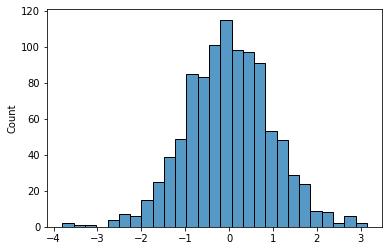

In [5]:
normal = numpyro.distributions.Normal(loc=0., scale=1.)
samples = normal.sample(jax.random.PRNGKey(0), (1000,))
seaborn.histplot(samples)

<AxesSubplot:ylabel='Count'>

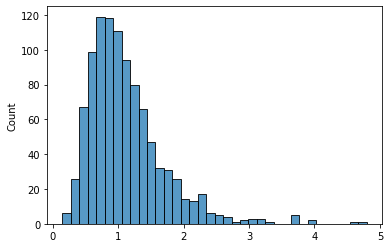

In [9]:
transforms_list = [
    numpyro.distributions.transforms.ExpTransform()
]
dist = numpyro.distributions.TransformedDistribution(
    base_distribution=numpyro.distributions.Normal(0., 0.5),
    transforms = transforms_list
)
samples = dist.sample(jax.random.PRNGKey(0), (1000,))
seaborn.histplot(samples)

<AxesSubplot:>

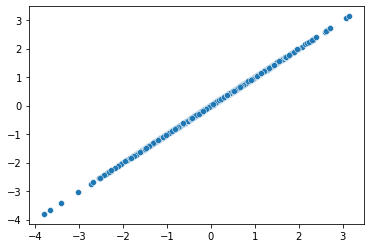

In [18]:
key = jax.random.PRNGKey(0)
normal = numpyro.distributions.Normal(loc=0., scale=1.)
x_samples = normal.sample(key, (1000,))
y_samples = normal.sample(key, (1000,))
seaborn.scatterplot(x=x_samples, y=y_samples)

In [15]:
import dataclasses
@dataclasses.dataclass
class PRNGIterator():
    seed: int = 0
    def __iter__(self):
        self.key = jax.random.PRNGKey(self.seed)
        return self
    def __next__(self):
        self.key, subkey = jax.random.split(self.key)
        return self.key

<AxesSubplot:>

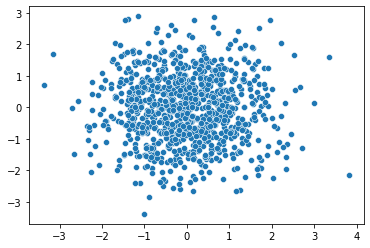

In [17]:
prng_iter = iter(PRNGIterator(0))
normal = numpyro.distributions.Normal(loc=0., scale=1.)
x_samples = normal.sample(next(prng_iter), (1000,))
y_samples = normal.sample(next(prng_iter), (1000,))
seaborn.scatterplot(x=x_samples, y=y_samples)